In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [22]:
df = pd.read_csv("Threats (1).csv")
df.head()

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0


In [23]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [26]:
X.fillna(X.median(), inplace=True)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [28]:
dt_model = DecisionTreeClassifier(
    class_weight="balanced",
    max_depth=10,  
    min_samples_split=5, 
    min_samples_leaf=2,  
    criterion="entropy",  
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/home/ananyaraj/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:16:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


In [32]:
models = {"Decision Tree": y_pred_dt, "Random Forest": y_pred_rf, "XGBoost": y_pred_xgb}
for name, y_pred in models.items():
    auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name} Model Evaluation:")
    print("AUC Score:", auc)
    print("F1 Score:", f1)
    print("MCC:", mcc)
    print("Classification Report:\n", report)
    print("-" * 50)


Decision Tree Model Evaluation:
AUC Score: 1.0
F1 Score: 1.0
MCC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00     23869

    accuracy                           1.00     27069
   macro avg       1.00      1.00      1.00     27069
weighted avg       1.00      1.00      1.00     27069

--------------------------------------------------
Random Forest Model Evaluation:
AUC Score: 1.0
F1 Score: 1.0
MCC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00     23869

    accuracy                           1.00     27069
   macro avg       1.00      1.00      1.00     27069
weighted avg       1.00      1.00      1.00     27069

--------------------------------------------------
XGBoost Model Evaluation:
AUC Score: 1.0
F1 Score: 1.0
M

In [33]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df.loc[0, 'B'])


4


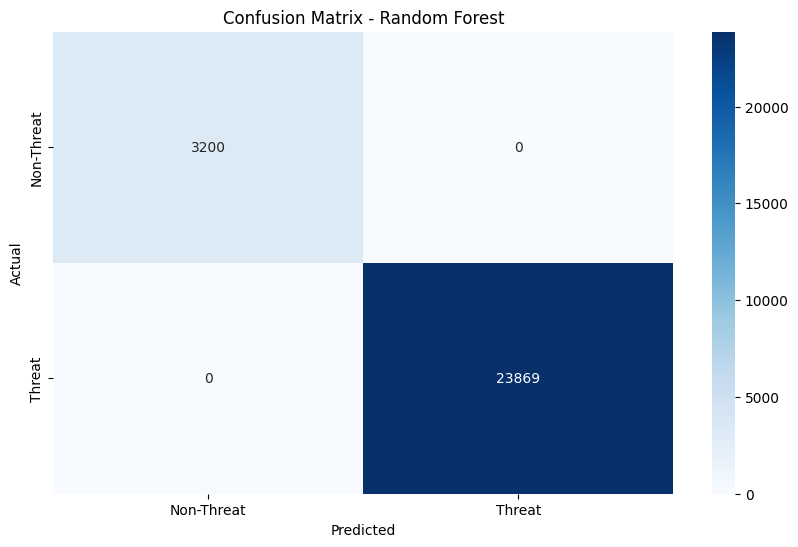

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Threat", "Threat"], yticklabels=["Non-Threat", "Threat"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

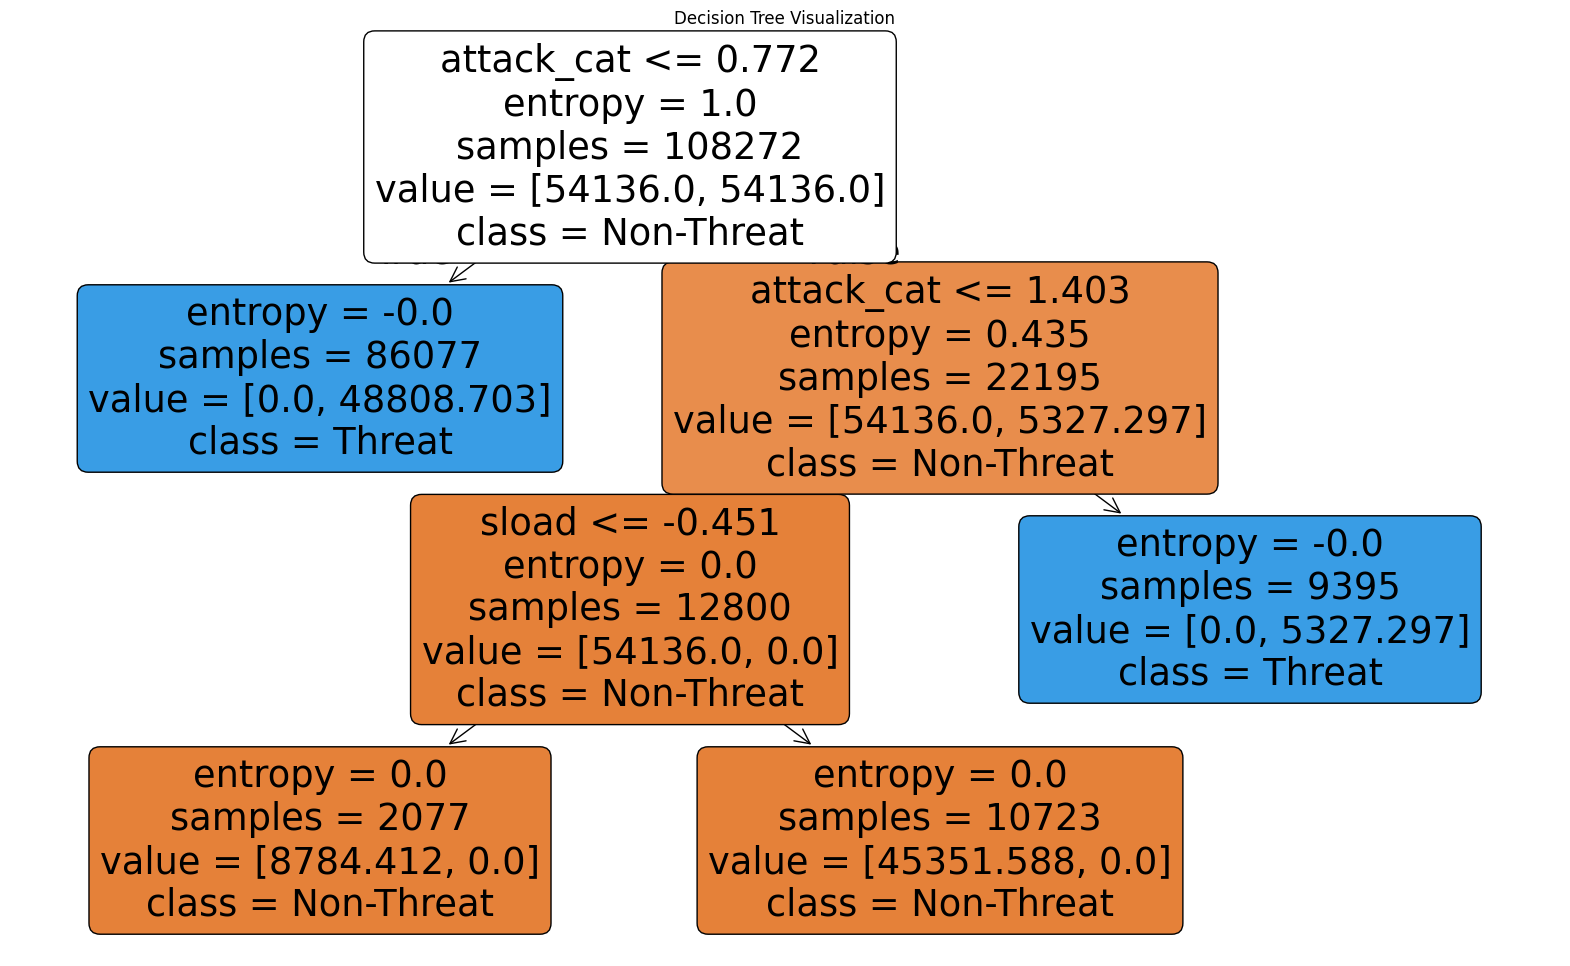

In [35]:
plt.figure(figsize=(20, 12))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Non-Threat", "Threat"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


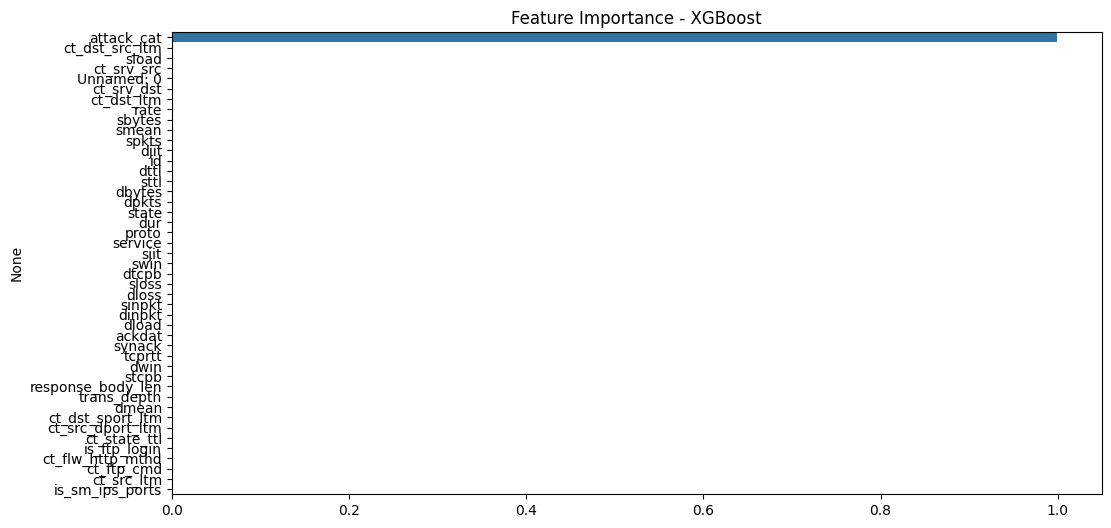

In [36]:
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance - XGBoost")
plt.show()
